In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp

df = pd.read_excel("./Data/iris.xlsx")
df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
### ***********************************#
#1. What is structure of the dataset.
#**********************************#
print(df.shape)

(150, 6)


In [3]:
#as we can see it has 150 rows and 6 column which are : Id, SepalLength, SeplalWdith, PetalLength, PetalWdith and species. 
print(df.columns)

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'species'],
      dtype='object')


In [4]:
#columns (SepalLength, SeplalWdith, PetalLength, PetalWdith), each contains one null value.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  149 non-null    float64
 2   SepalWidth   149 non-null    float64
 3   PetalLength  149 non-null    float64
 4   PetalWidth   149 non-null    float64
 5   species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
#*****************************************#
#2. What are the data type of each columns?
#*****************************************#

#after running below command we can see that; Id is integer datatype,
#SepalLength, SeplalWdith, PetalLength, PetalWdith are float datatype and species is object datatype 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  149 non-null    float64
 2   SepalWidth   149 non-null    float64
 3   PetalLength  149 non-null    float64
 4   PetalWidth   149 non-null    float64
 5   species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
#**********************************************#
#3. What is the length of alpha numeric columns?
#**********************************************#

#the length of alpha numeric column is the length of the largest alphanumeric value in that column.

print("Leghth of columns is",len(df['species']))
print("")
maxvalue=df['species'].max()
print(maxvalue)
print(df.species.str.isalnum().sum())



Leghth of columns is 150

setosa
2


In [7]:
#************************************************#
#4. What are precision & scale of numeric columns?
#************************************************#
#The precision of a numeric is the total count of significant digits in the whole number, that is, the number of 
#digits to both sides of the decimal point. The scale of a numeric is the count of decimal digits in the fractional part,
# to the right of the decimal point. So the number 23.5141 has a precision of 6 and a scale of 4. Integers can be 
#considered to have a scale of zero.

#Since Column 'Id' is of type Integer that is why its considered to have a scale of zero.
#and the Precision is:
maxid=df['Id'].max()
strid=len(str(maxid))
print("Precision of column Id is:",strid,"\tvalue= ",maxid)

#list of other numeric columns:
    
numcol_list=[]    
for numcols in df.columns:
    if(numcols=='species' or numcols=='Id'):
        continue
    else:
        numcol_list.append(numcols)
print("\n",numcol_list)        

def percision_Scale(col):
    prevs=0
    currt=0
    for b in df[col]:
        prevs=currt
        currt=len(str(b))
        if(currt>prevs):
            maxlength=currt
            element=str(b) 
    frac_digits=element.split('.')[1]
    print(col, ": value= ",element,"\nPrecision=",maxlength-1," Precision value=",element,"\tScale: ",len(frac_digits),"\tScale value: ",frac_digits,"\n")
            

for numcolitem in numcol_list:
    percision_Scale(numcolitem)

Precision of column Id is: 3 	value=  150

 ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
SepalLength : value=  5.1 
Precision= 2  Precision value= 5.1 	Scale:  1 	Scale value:  1 

SepalWidth : value=  3.5 
Precision= 2  Precision value= 3.5 	Scale:  1 	Scale value:  5 

PetalLength : value=  3.321 
Precision= 4  Precision value= 3.321 	Scale:  3 	Scale value:  321 

PetalWidth : value=  0.2 
Precision= 2  Precision value= 0.2 	Scale:  1 	Scale value:  2 



In [8]:
#***********************************#
#5. What are the significant columns?
#***********************************#

#In a dataset significant columns are those which provide important informatiosn on which we can perform 
#different operations.
#In this dataset Id is not a significant column because it doesn't provide relative informations regarging
#flowers whereas columns; SepalLength, SepalWidth, PetalLength ,species and PetalWidth are significant columns
#because they give relative and usefull information about flowers. for example based on species we
#can classify those flowers. 


In [9]:
#**********************************************#
# 6. Identify significant columns of the dataset.
#**********************************************#
sigcol_list=[]    
for scols in df.columns:
    if(scols!='Id'):
        sigcol_list.append(scols)        
print("\n",sigcol_list)        



 ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'species']


In [10]:
#****************************************#
# 7. Find out for each significant column
# ▪ Number of Null values
# ▪ Number of zeros
#****************************************#

#***** Number of Null value *****#
print("#*****Number of Zeros*****#")
print(df.isnull().sum())
# print(df.any())
print("")
print("*****sum of Zeros*****")
print((df==0).sum())


#*****Number of Zeros*****#
Id             0
SepalLength    1
SepalWidth     1
PetalLength    1
PetalWidth     1
species        0
dtype: int64

*****sum of Zeros*****
Id             0
SepalLength    1
SepalWidth     1
PetalLength    1
PetalWidth     1
species        0
dtype: int64


In [11]:
#******************************#
# 8. For each significant column
# ▪ Provide the obvious errors
#******************************#

print("*** obvious errors ***")
print(df.groupby(['species'])['SepalLength'].count())
print("")

*** obvious errors ***
species
IRIS-VERSICOLOR      2
Iris-setosa         48
Iris-versicolor     48
Iris-virginica      48
Iris-virginica       2
setosa               1
Name: SepalLength, dtype: int64



In [12]:
#***********************************************************#
# 9. For each numeric column
# ▪ Replace null values & zeros with mean value of the column.
#***********************************************************#
sLength = float(df['SepalLength'].mean().round(decimals=1))
print('SepalLength Mean')
print(sLength)

sWidth = float(df['SepalWidth'].mean().round(decimals=1))
print('SepalWidth Mean')
print(sWidth)

pLength = float(df['PetalLength'].mean().round(decimals=1))
print('PetalLength Mean')
print(pLength)

pWidth = float(df['SepalWidth'].mean().round(decimals=1))
print('SepalWidth Mean')
print(pWidth)

# update
df['SepalLength'] = np.where(df['SepalLength'].isnull(), sLength, df['SepalLength'])
df['SepalLength'] = df['SepalLength'].astype(float)

df['SepalWidth'] = np.where(df['SepalWidth'].isnull(), sWidth, df['SepalWidth'])
df['SepalWidth'] = df['SepalWidth'].astype(float)

df['PetalLength'] = np.where(df['PetalLength'].isnull(), pLength, df['PetalLength'])
df['PetalLength'] = df['PetalLength'].astype(float)

df['PetalWidth'] = np.where(df['PetalWidth'].isnull(), pWidth, df['PetalWidth'])
df['PetalWidth'] = df['PetalWidth'].astype(float)

print("***** Checking the values after *****")
print(df.isnull().sum())


SepalLength Mean
5.8
SepalWidth Mean
3.0
PetalLength Mean
3.7
SepalWidth Mean
3.0
***** Checking the values after *****
Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
species        0
dtype: int64


In [13]:
#***************************************************************#
# 10. For each significant column
# ▪ Provide the quartile summary along with the count, mean & sum
#***************************************************************#
df.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.812667,3.026667,3.734140,1.202667
std,43.445368,0.952799,0.494896,1.769159,0.777964
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.300000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,3.000000


In [14]:

#**************************************************#
#11. For each significant column
#▪ Provide the range, variance and standard deviation
#**************************************************#
print("*****range ******")
print(df.min()-columns.max())

#*****************************VARIANCE********************************#
print("*****VARIANCE******")
print(df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].var())

#*************************STANDARD DEVIATION****************************#
print("*****STANDARD DEVIATION******")
print(df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].std())

*****range ******


NameError: name 'columns' is not defined

In [15]:
###############################################
#12. For each significant column
#▪ Provide the count of outliers and their value
###############################################

import utils
# check outlier index
print('\n*** Outlier Index ***')
print(utils.OutlierIndex(df))

# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))


*** Outlier Index ***
Id 
[] 
SepalLength 
[[5]] 
SepalWidth 
[[5]] 
PetalLength 
[] 
PetalWidth 
[] 


*** Outlier Values ***
Column:  Id
[]
 
Column:  SepalLength
[0.]
 
Column:  SepalWidth
[0.]
 
Column:  PetalLength
[]
 
Column:  PetalWidth
[]
 
Id 
[] 
SepalLength 
[0.] 
SepalWidth 
[0.] 
PetalLength 
[] 
PetalWidth 
[] 



In [16]:
#**********************************************************#
#13. Are there any class variables? If yes,
#▪ provide frequency distribution table & chart for the same
#**********************************************************#
import warnings
warnings.filterwarnings('ignore')

# create list of class variable manually
colNames = df[['species']]

for colName in colNames:
    print("\n*"+colName+"*")
    print(df.groupby(colName).size())
    print("")


*species*
species
IRIS-VERSICOLOR      2
Iris-setosa         48
Iris-versicolor     48
Iris-virginica      48
Iris-virginica       2
setosa               2
dtype: int64



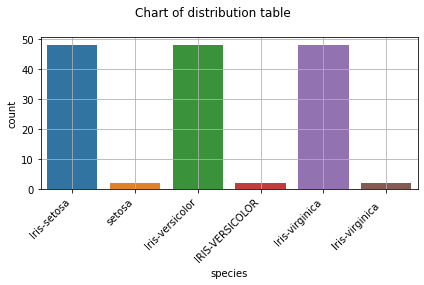

In [17]:
#Chart of Distribution table
plt.figure()
plt.suptitle("Chart of distribution table")
ax = sns.countplot(df[colName],label="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

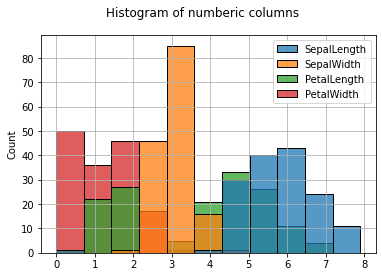

In [18]:
#****************************#
#14. For all numeric columns
#▪ Provide histogram
#****************************#
columns = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
plt.figure()
plt.suptitle('Histogram of numberic columns')
sns.histplot(data=columns,kde=False)
plt.grid()
plt.show()

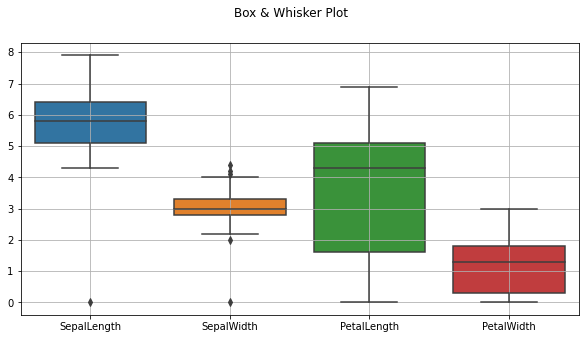

In [19]:
##############################
#15. For all numeric variables
#▪ Provide box & whisker plot
##############################

columns = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

# quan = columns.quantile(0.95)
# maxim = df[columns >quan]
# maxim.sum()
plt.figure(figsize=(10,5))
plt.suptitle('Box & Whisker Plot')
sns.boxplot(data=columns)
plt.grid()
plt.show()

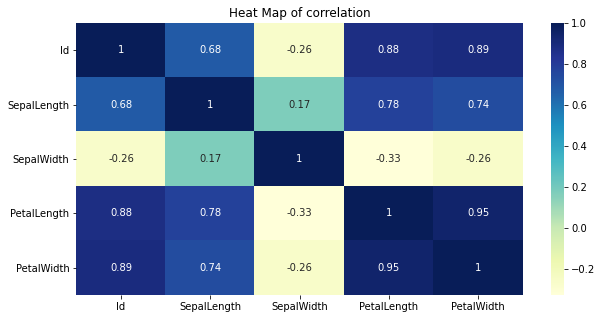

In [20]:
#*******************************#
#16 For all numeric variables
#▪ Provide correlation table & graph
#***********************************#
df.corr()
plt.figure(figsize=(10,5))
plt.title('Heat Map of correlation')
ax = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [21]:
print("\n*** Correlation Table ***")
print(df.corr())


*** Correlation Table ***
                   Id  SepalLength  SepalWidth  PetalLength  PetalWidth
Id           1.000000     0.680396   -0.262327     0.879761    0.894334
SepalLength  0.680396     1.000000    0.173776     0.781153    0.736881
SepalWidth  -0.262327     0.173776    1.000000    -0.326692   -0.255910
PetalLength  0.879761     0.781153   -0.326692     1.000000    0.945665
PetalWidth   0.894334     0.736881   -0.255910     0.945665    1.000000


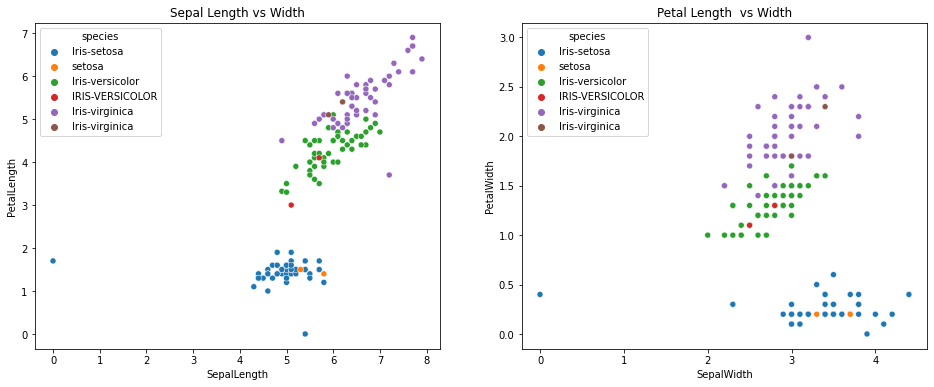

<Figure size 576x360 with 0 Axes>

In [22]:
#***************************************#
# 17. Based on the correlation table
# ▪ Provide scatter plot relevant columns
#***************************************#

#sns.pairplot(data=df,hue='species')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
plt.figure(figsize=(8,5))
plt.suptitle('Scatter plot of relevent columns')

ax1.set_title('Sepal Length vs Width')
sns.scatterplot(x='SepalLength',y='PetalLength',hue='species',data=df,ax=ax1)

ax2.set_title('Petal Length  vs Width')
sns.scatterplot(x='SepalWidth',y='PetalWidth',hue='species',data=df,ax=ax2)

plt.show()

In [23]:


#**********************************************************************#
# 18. Use relevant statistical test to check if population mean value of 
#SepalLength is significantly different from 6.25. Use 0.06 as α(alpha)
#**********************************************************************#

##############################################################
# Hypothesis Test
##############################################################

# Problem: Check if the population mean value of sepallength is significantly differnt from 6.25.

#Ho:	m = 6.25
#Ha:	m != 6.25
#Tail: Two
#a is 0.06

# null hyp
Ho = "mu = 6.25"
# alt hyp
Ha = "mu != 6.25"
# alpha
al = 0.06
# mu - mean
mu = 6.25
# tail type
tt = 2
# data
SepalLength = df['SepalLength'].values
# print
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)

print("")
print("*** Testing Results ***")
print("")

ts, pv = ttest_1samp(SepalLength, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)


Ho: mu = 6.25
Ha: mu != 6.25
al: 0.06
mu: 6.25

*** Testing Results ***

t-stat -5.62156358518791
p-vals 9.057846883294415e-08
1t pv 1.811569376658883e-07
2t pv 9.057846883294415e-08
Null Hypothesis: Rejected
Conclusion: mu != 6.25


In [24]:
#********************************************************************************************************#
#19. Use relevant statistical test to check if the population mean value of PetalWidth is no more than 1.5.
#********************************************************************************************************#


##############################################################
# Hypothesis Test
##############################################################

# Problem: Check if the population mean age is PetalWidth more than 1.5

#Ho:	m <= 1.5
#Ha:	m > 1.5
#Tail: One
#Test: One Sample Mean without std

from scipy.stats import ttest_1samp


# null hyp
Ho = "mu <= 1.5"
# alt hyp
Ha = "mu > 1.5"
# alpha
al = 0.06
# mu - mean
mu = 1.5
# tail type
tt = 1
# data
PetalWidth = df['PetalWidth'].values
# print
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)

print("")
print("*** Testing Results ***")
print("")

ts, pv = ttest_1samp(PetalWidth, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)

Ho: mu <= 1.5
Ha: mu > 1.5
al: 0.06
mu: 1.5

*** Testing Results ***

t-stat -4.680904884305198
p-vals 6.3672982690451405e-06
1t pv 1.2734596538090281e-05
2t pv 6.3672982690451405e-06
Null Hypothesis: Rejected
Conclusion: mu > 1.5


In [ ]:

#***********$$$$$$$$******REPORT*******$$$$$$$$$****************#

# import pandas_profiling as pp
# profile = pp.ProfileReport(df) 
# profile.to_file("report2.html")

In [ ]:
#*************** Exploratory Data Analysis *******************#
""" 
                    OVERVIEW
                    
                #Reproduction

Analysis started	2020-12-14-20 16:17:29.249705
Analysis finished	2020-12-20 16:17:36.200341
Duration	        7 Days
python packages 	 Pandas,Numpy,Matplotlib,Seaborn,Scipy
IDE 	             Spyder , Jupyter Notebook


               #Dataset statistics

Number of variables	                 6
Number of observations	             150
Missing cells	                     4
Missing cells (%)	                 0.4%
Duplicate rows	                     0
Duplicate rows (%)	                 0.0%
Total size in memory	             7.2 KiB
Average record size in memory	     48.9 B

                    #VARIABLE TYPE
                    
Numerical	           0 to 7.9  
Categorical 	       4 (Iris-setosa, setosa ,Iris-versicolor, Iris-virginica)

                    #VARIABLE
                    
                    SepalWidth  PetalLength PetalWidth species
    Distinct	     36             45          23         6
    Missing	1	     1              1           1          0
    Mean	         5.8            3.7         1.1
    Minimum	         0              0           0
    Maximum	         7.9            6.9         2.5
    Zeros	         1              1           1

    1.SepalWidth
    Distinct	36
    Missing	1
    Mean	5.812751678
    Minimum	0
    Maximum	7.9
    Zeros	1
 
    
    2.SepalWidth
    Distinct	24
    Missing	1
    Mean	3.026845638
    Minimum	0
    Maximum	4.4
    Zeros	1
    
    3.PetalLength
    Distinct	45
    Missing	1
    Mean	3.734369128
    Minimum	0
    Maximum	6.9
    Zeros	1
    
    4.PetalWidth
    Distinct	23
    Missing	1
    Mean	1.190604027
    Minimum	0
    Maximum	2.5
    Zeros	1
    
    5.species
    Distinct	6
    Missing	0
    
    
        
    #Visualization:
      Distributaion Table :It is indicating that how our data is distributed.
    
      Box & Whisker Plot: Here we notice that we have 3 out liers in our dataset.
      
    #Co-relation:
        With the help o heat map we observe that the column PetalLength & PetalWidth are Highly Co-related to each other
      
    
    ***Conclusion:***
      Here in EDA we use Hypothesis testing for testing and getting final.
      Where our population mean value of sepallength is not equal to 6.25.
      In other hand we done testing on population mean age is PetalWidth were we find the mean is greater then 1.5
      

"""